__собираем статистики по объявлениям о продаже домов__

_Evgeny S. Borisov <parser@mechanoid.su>_

In [1]:
!date

Вт 15 окт 2024 11:04:35 MSK


# загружаем данные

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df = pd.read_pickle('data/2024/df_house.pkl')
df['dt'] = df['ts'].dt.date
display( len(df) )
cols = ['title','address','latitude','longitude','priceM','dt']
display( df.sample(3)[cols] )

63902

title  \
63022  дом 95,4 м² на участке 4,1 сот.   
63182  дом 93,1 м² на участке 5,1 сот.   
8495             дом, 84,2 м², 15 сот.   

                                                 address   latitude  \
63022      севастополь,садоводческое товарищество гранат  44.534835   
63182  севастополь,садоводческое товарищество ветеран,14  44.573599   
8495                           севастополь,р-н ленинский  44.580244   

       longitude  priceM          dt  
63022  33.481055    6.50  2024-07-30  
63182  33.502363    7.00  2024-07-30  
8495   33.524632    4.90  2024-06-10

In [4]:
display(len(df))
df = df[ ~df['url'].str.match(r'.*cian\.ru.*') ].reset_index(drop=True)
display(len(df)) # только авито

63902

42680

In [5]:
def address_filter(df):
    #           46.319437, 33.911048
    #
    # 45.402617, 32.455625 |  45.545301, 36.684702
    #
    #          44.320887, 33.917013

    df['latitude'] = pd.to_numeric( df['latitude'], errors='coerce' )
    df['longitude'] = pd.to_numeric( df['longitude'], errors='coerce' )

    df = df.query('(32.4<longitude<36.7) & (44.3<latitude<46.4)') 

#     df.loc[ df['address']=='Севастополь,Чёрное море', ['latitude','longitude'] ] = None
#     df.loc[ df['address'].str.lower().str.match('чёрное море'), ['latitude','longitude'] ] = None 

#     df.loc[ df['address']=='квартал Старый Город', 'place'] = 'turkie'
#     df.loc[ df['address'].str.lower().str.match('анталья'), 'place' ] = 'turkie' 

#     df.loc[ df['address'].str.lower().str.match(r'.*бахчисарай.*'), 'place' ] = 'bahchisaray'
#     df.loc[ df['address'].str.lower().str.match(r'.*севастополь,.*'), 'place' ] = 'sevastopol'

#     df.loc[ df['address'].str.lower().str.match(r'.*мысовское.*'), 'place' ] = 'kerch'
    df.loc[ df['address'].str.lower().str.match(r'.*алушта.*'), 'place' ] = 'alushta'
    df.loc[ df['address'].str.lower().str.match(r'.*гурзуф.*'), 'place' ] = 'gurzuf'

#     df.loc[ df['address'].str.lower().str.match(r'.*с.лучистое.*'), 'place' ] = 'alushta'
#     df.loc[ df['address'].str.lower().str.match(r'.*снт солнечная долина.*'), 'place' ] = 'sudak'
#     df.loc[ df['address'].str.lower().str.match(r'.*пгт.новоозёрное.*'), 'place' ] = 'evpatoria'

#     df.loc[ df['address'].str.lower().str.match(r'.*с.мирное.*'), 'place' ] = 'simferopol'
#     df.loc[ df['address'].str.lower().str.match(r'.*тсн аэрофлот.*'), 'place' ] = 'simferopol'

#     df.loc[ df['address'].str.lower().str.match(r'.*семисот.*'), 'place' ] = 'kerch'

#     df.loc[ df['address'].str.lower().str.match(r'.*заветное.*') , 'place' ] = 'kerch'
    df.loc[ df['address'].str.lower().str.match(r'.*ленинский район.*') , 'place' ] = 'kerch'
    df.loc[ df['address'].str.lower().str.match(r'.*симферопольский район.*'), 'place' ] = 'simferopol'
    df.loc[ df['address'].str.lower().str.match(r'.*белогорский район.*'),'place'] = 'belogorsk'
    df.loc[ df['address'].str.lower().str.match(r'.*кировский район.*'),'place'] = 'kirovsky'
    
    df.loc[ df['address'].str.lower().str.match(r'.*ялта.*') , 'place' ] = 'yalta'
    df.loc[ df['address'].str.lower().str.match(r'.*феодосия.*') , 'place' ] = 'feodosia'
    df.loc[ df['address'].str.lower().str.match(r'.*окуневка.*') , 'place' ] = 'tarkhankut'
    df.loc[ df['address'].str.lower().str.match(r'.*евпатория.*') , 'place' ] = 'evpatoria'

    df = df.dropna(subset=['latitude','longitude'])
    
    return df

In [6]:
display( len(df) )
df = address_filter(df)
display( len(df) )

42680

42674

---

In [7]:
# df_ = pd.read_pickle('data/2023/data_house.pkl').rename(columns={'adr':'address'})
# df_['dt'] = df_['ts'].dt.date
# display( len(df_) )
# display( df_.sample(3)[cols] )

In [8]:
# df_ = (
#         df_
#         .dropna(subset=['dt','url'])
#         .drop_duplicates(['dt','url'])
#         .drop(columns=['adr_orig','obj_name','avito_page'])
#     )
# display( len(df_) )
# cols = ['title','address','latitude','longitude','priceM','dt','url']
# display( df_.sample(3)[cols] )

In [9]:
# # history_date = df_['dt'].max()
# history_date = pd.to_datetime('2023-01-10').date()
# display(history_date)

In [10]:
# df = pd.concat([df,df_]).reset_index(drop=True)
# display( len(df) )
# del df_

---

In [11]:
df['month'] = df['ts'].dt.to_period('M')
df['week'] = df['ts'].dt.to_period('W')

---

In [12]:
# display( len(df) )
# df = df.dropna(subset=['latitude','longitude'])
# display( len(df) )

In [13]:
display(len(df))
# выкидываем "ущербные" варианты 
df = df.query('~(is_part) & (house_area>40.) & (priceM<15.)')
display(len(df))
df = df.query('priceM>1.') # выкидываем предожения с аномально низкой ценой
display(len(df))

42674

28973

28900

In [14]:
gdf = gpd.GeoDataFrame( df, geometry = gpd.points_from_xy( df['longitude'], df['latitude']), crs='epsg:4326', )
# [['title','address','latitude','longitude','priceM']] 
display( gdf.sample(3)[cols])

title  \
34358     дом 87 м² на участке 8 сот.   
19145     дом 64 м² на участке 5 сот.   
37927  дом 237,2 м² на участке 6 сот.   

                                                address  latitude  longitude  \
34358                                бахчисарай,35к-020     44.58      33.94   
19145  севастополь,садоводческое товарищество алмаз,232     44.79      33.58   
37927                       севастополь,приятная ул.,10     44.66      33.59   

       priceM          dt  
34358    5.51  2024-07-22  
19145    4.90  2024-10-15  
37927   14.50  2024-09-03

---

---

In [15]:
dt_max = df['dt'].max()
dt_min = df['dt'].min()
print( dt_min, ' : ',dt_max )
# display( dt_min,history_date,dt_max )

2024-06-07  :  2024-10-15


In [16]:
display( len(gdf) )
gdf = (
    gdf
    .query("place in ('sevastopol','sudak','bahchisaray')")
    # .drop_duplicates(['dt','url'])
    .drop_duplicates(['url','week'])
    .reset_index(drop=True)
)
display( len(gdf) )

28900

24096

In [17]:
# df[ df['address'].str.match('ялта') ]

In [18]:
# gdf = gdf.query('place in ("bahchisaray","sudak","sevastopol")')

In [19]:
# gdf_history = gdf.query(f'dt <= @history_date')
# gdf = gdf.query(f'dt > @history_date')

In [20]:
# display( len(gdf_history) )
# display( len(gdf) )

---

In [21]:
# cols = ['title','address','latitude','longitude','priceM','dt','place','url']
# gdf[ (gdf['place']=='sevastopol') & (gdf['address'].str.match(r'.*Судак.*')) ][cols]

In [22]:
# gdf['place'].unique()

# общая статистика

In [23]:
# gdf[['title','address','priceM','geometry']].sample(512).explore()

In [24]:
gdf.query('place=="sevastopol"')[['title','address','priceM','geometry']].sample(512).explore()

In [25]:
# gdf[ gdf['address'].str.match(r'.*ялта.*') ]
# gdf[ gdf['address'].str.match(r'.*окуневка.*') ]
# gdf[ gdf['address'].str.match(r'.*заветное.*') ]

In [26]:
gdf.query('place=="bahchisaray"')[['title','address','priceM','geometry']].explore()

In [28]:
gdf.query('place=="sudak"')[['title','address','priceM','geometry']].explore()

In [29]:
percentiles=[.01,.05,.1,.25,.5,.75,.9,.95]
stat = (
        #gdf.groupby(['place','house_size_category','month'],observed=True)
        gdf.groupby(['place','house_size_category','week'],observed=True)
    
        ['priceM'].describe(percentiles=percentiles)
    )

# display( stat )

In [30]:
stat.reset_index()['house_size_category'].unique()

['30-50', '50-70', '70-110', '110-180', '180-300', '300+']
Categories (6, object): ['30-50' < '50-70' < '70-110' < '110-180' < '180-300' < '300+']

In [31]:
import matplotlib.pyplot as plt

cols = ['1%','10%','25%','50%','75%']
# sizes = stat.reset_index()['house_size_category'].unique()
sizes = ['50-70', '70-110','110-180', '180-300' ]
# sizes = ['50-70', '70-150','150-300' ]
display(sizes)

['50-70', '70-110', '110-180', '180-300']

In [32]:
# display(len(gdf))
# gdf_ = gdf[ gdf['house_size_category'].isin(sizes) ].reset_index()
# display(len(gdf_))
# gdf_[['title','house_size_category']]

In [33]:
# dt_now = pd.to_datetime('2024-06-17').date()
# dt_now = gdf['dt'].max()

In [34]:
# (
# gdf
# .query('house_size_category in @sizes')
# .drop_duplicates(['url'])
# .groupby(['house_size_category','place'],observed=True)['url'].count()
# .reset_index()
# .pivot(index='place', columns='house_size_category', values='url')
# .plot.barh(title='количество предложений') #,log=True)
# .grid(axis='x')    
# )

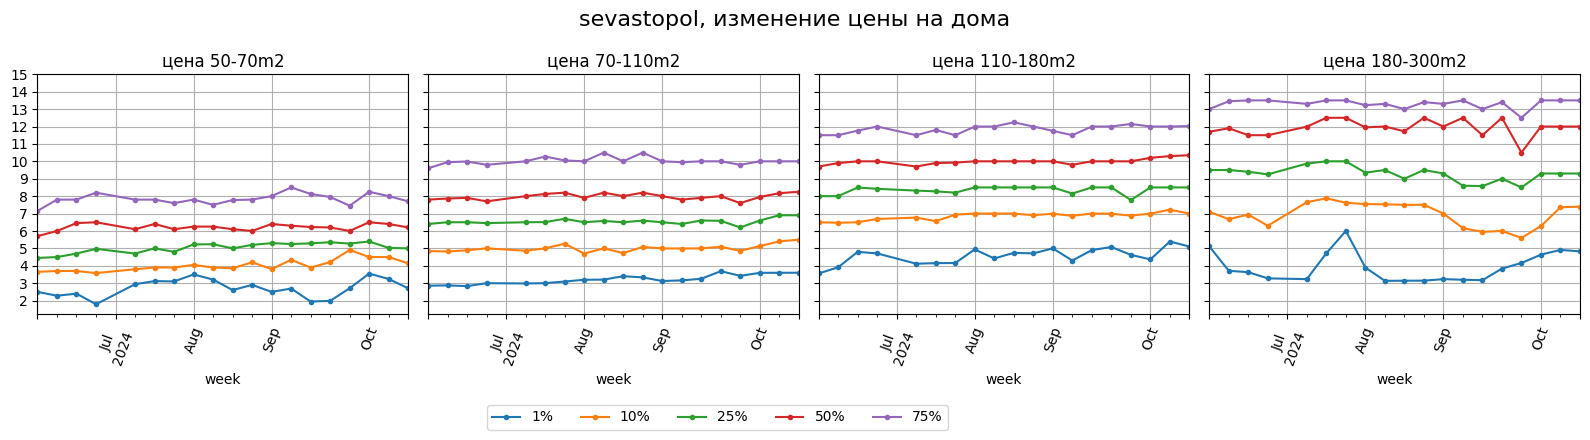

In [35]:
place = 'sevastopol'

fig, ax = plt.subplots(1,len(sizes),figsize=(16,4), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(place,s),cols].plot(title=f'цена {s}m2', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   
    ax[i].set_yticks( np.arange(2, 16, step=1) )

fig.suptitle(f'{place}, изменение цены на дома', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

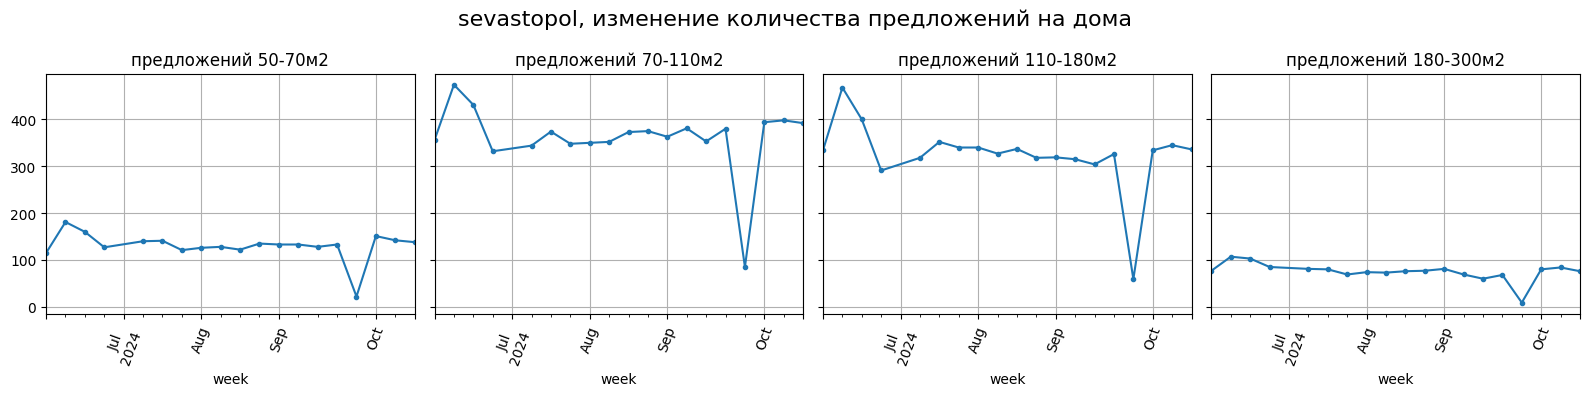

In [36]:
fig, ax = plt.subplots(1,len(sizes),figsize=(16,4), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(place,s),'count'].plot(title=f'предложений {s}м2', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'{place}, изменение количества предложений на дома', fontsize=16)
fig.tight_layout()

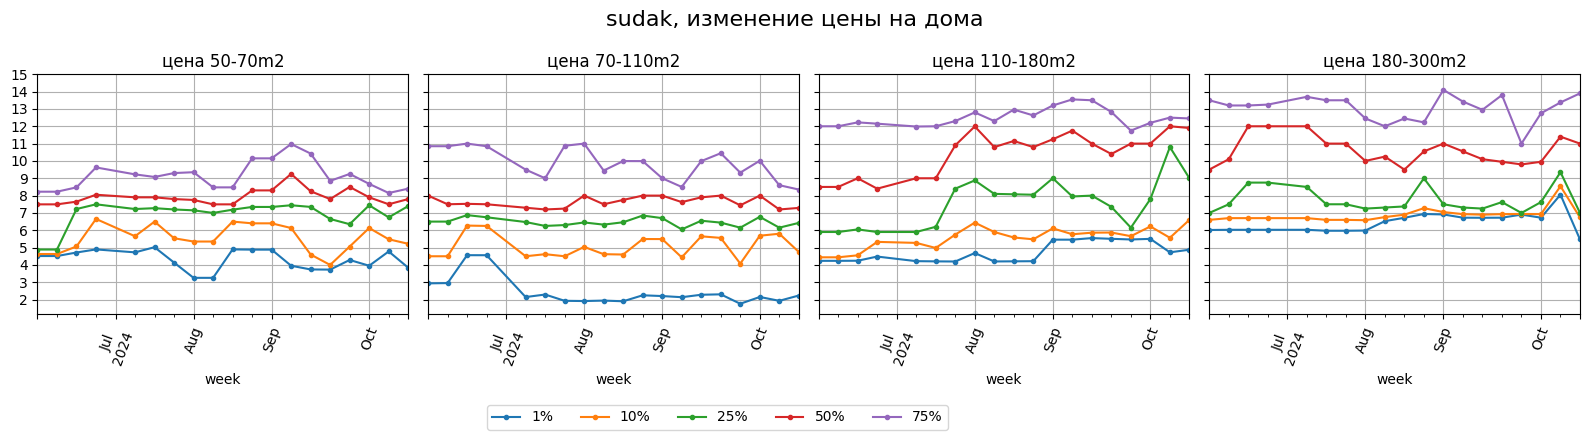

In [37]:
place = 'sudak'

fig, ax = plt.subplots(1,len(sizes),figsize=(16,4), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(place,s),cols].plot(title=f'цена {s}m2', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )  
    ax[i].set_yticks( np.arange(2, 16, step=1) )

fig.suptitle(f'{place}, изменение цены на дома', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

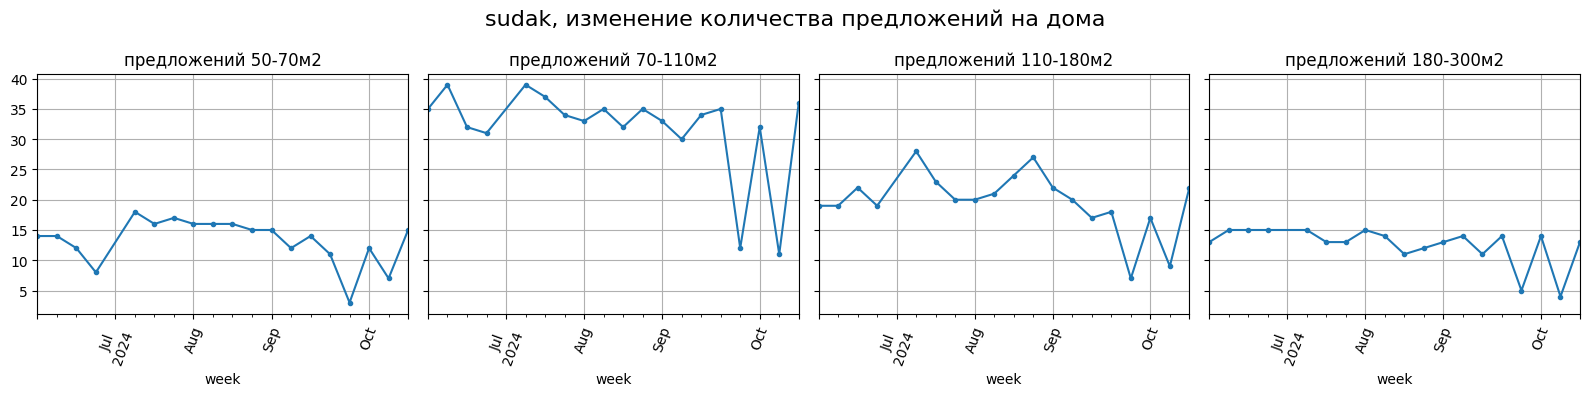

In [38]:
fig, ax = plt.subplots(1,len(sizes),figsize=(16,4), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(place,s),'count'].plot(title=f'предложений {s}м2', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'{place}, изменение количества предложений на дома', fontsize=16)
fig.tight_layout()

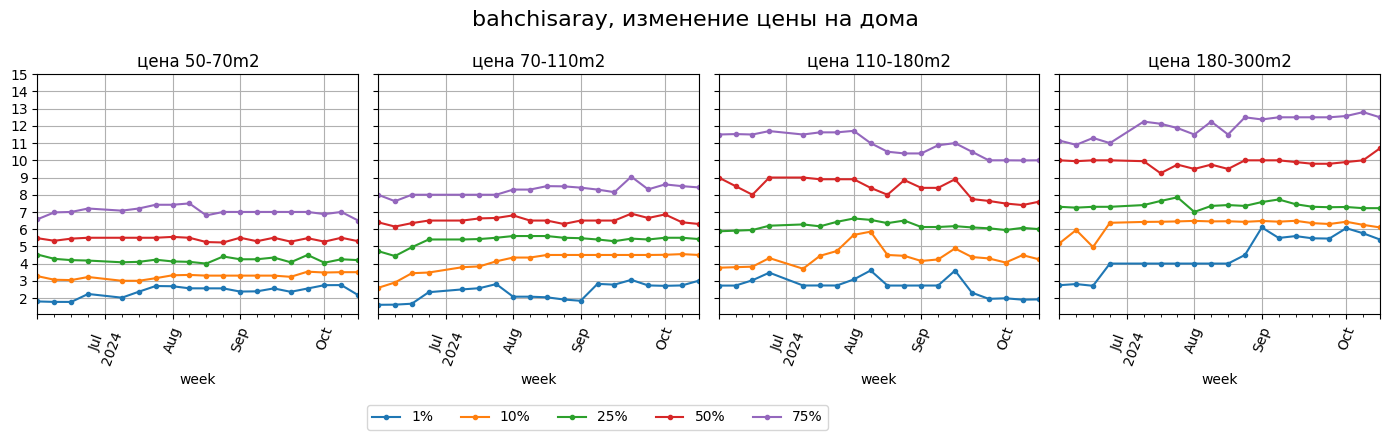

In [39]:
place = 'bahchisaray'

fig, ax = plt.subplots(1,len(sizes),figsize=(14,4), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(place,s),cols].plot(title=f'цена {s}m2', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   
    ax[i].set_yticks( np.arange(2, 16, step=1) )

fig.suptitle(f'{place}, изменение цены на дома', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

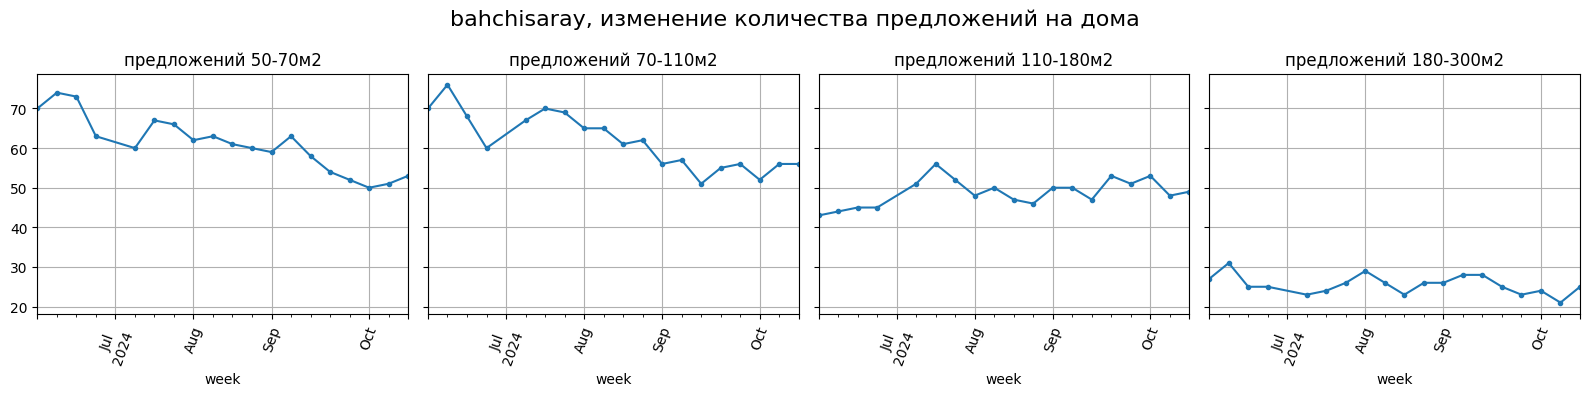

In [40]:
fig, ax = plt.subplots(1,len(sizes),figsize=(16,4), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(place,s),'count'].plot(title=f'предложений {s}м2', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'{place}, изменение количества предложений на дома', fontsize=16)
fig.tight_layout()

# актуальная цена

In [41]:
# dt_now = pd.to_datetime('2024-06-17').date()
dt_now = gdf['dt'].max()
display(len(gdf))
gdf_last = gdf[ gdf['dt'] == dt_now ]
display(len(gdf_last))

24096

1320

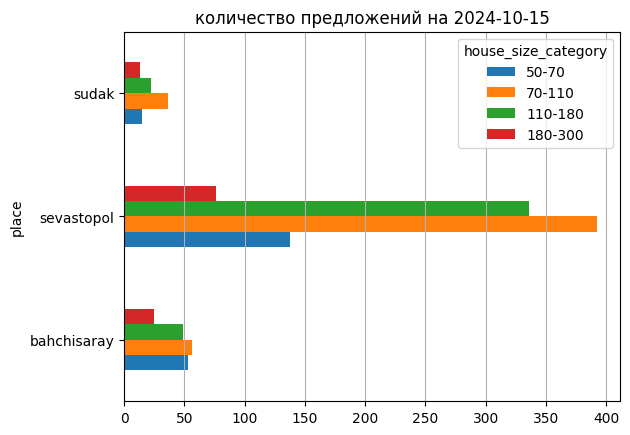

In [42]:
(
gdf_last
.query('house_size_category in @sizes')
.drop_duplicates(['url'])
.groupby(['house_size_category','place'],observed=True)['url'].count()
.reset_index()
.pivot(index='place', columns='house_size_category', values='url')
# .plot.barh(title='количество предложений') #,log=True)
.plot.barh(title='количество предложений на '+ str( dt_now ))
.grid(axis='x')    
)

In [43]:
(
    gdf_last
    .groupby(['place','house_size_category'],observed=False)
    ['priceM'].describe(percentiles=percentiles)
)

count  mean  std   min    1%    5%   10%  \
place       house_size_category                                             
bahchisaray 30-50                31.00  3.94 1.97  1.50  1.61  1.94  2.00   
            50-70                53.00  5.50 1.92  1.80  2.16  3.00  3.50   
            70-110               56.00  7.02 2.62  2.40  3.00  3.65  4.50   
            110-180              49.00  8.04 3.18  1.15  1.92  3.48  4.24   
            180-300              25.00 10.04 3.06  5.30  5.40  5.76  6.10   
            300+                  4.00 12.50 2.08 10.00 10.06 10.30 10.60   
sevastopol  30-50                61.00  5.36 1.87  2.00  2.57  3.30  3.60   
            50-70               138.00  6.64 2.34  1.74  2.70  3.52  4.14   
            70-110              392.00  8.50 2.39  3.20  3.60  4.64  5.50   
            110-180             336.00 10.41 2.51  3.45  5.10  6.47  7.00   
            180-300              76.00 11.33 2.66  4.00  4.82  6.22  7.40   
            300+                  5.00 10.98 2.14  8.50  8.54  8.68  8.86   
sudak       30-50                 5.00  5.62 2.80  2.50  2.58  2.90  3.30   
            50-70                15.00  7.89 2.21  3.70  3.84  4.40  5.22   
            70-110               36.00  7.48 2.51  1.50  2.24  3.75  4.75   
            110-180              22.00 10.81 2.82  4.63  4.88  5.83  6.60   
            180-300              13.00 10.48 3.40  5.30  5.47  6.14  6.74   
            300+                  3.00 10.67 1.53  9.00  9.04  9.20  9.40   

                                  25%   50%   75%   90%   95%   max  
place       house_size_category                                      
bahchisaray 30-50                2.35  3.60  5.30  6.00  7.60  9.00  
            50-70                4.20  5.30  6.50  7.92  9.61 10.00  
            70-110               5.42  6.30  8.43 10.22 12.15 14.50  
            110-180              6.00  7.60 10.00 12.70 13.50 14.55  
            180-300              7.22 10.70 12.50 13.60 14.37 14.60  
            300+                11.50 12.50 13.50 14.39 14.69 14.99  
sevastopol  30-50                4.10  4.95  6.00  7.15  9.50 11.00  
            50-70                5.00  6.20  7.70  9.73 11.04 14.00  
            70-110               6.90  8.25 10.00 11.90 12.84 14.50  
            110-180              8.50 10.35 12.03 14.00 14.50 15.00  
            180-300              9.30 12.00 13.50 14.00 14.20 15.00  
            300+                 9.40 11.50 11.50 13.00 13.50 14.00  
sudak       30-50                4.50  4.80  6.30  8.52  9.26 10.00  
            50-70                7.39  7.80  8.40 10.58 11.80 12.50  
            70-110               6.42  7.29  8.35 11.45 12.35 12.90  
            110-180              9.00 11.90 12.45 13.90 13.98 14.00  
            180-300              7.00 11.00 13.90 14.18 14.32 14.50  
            300+                10.00 11.00 11.50 11.80 11.90 12.00

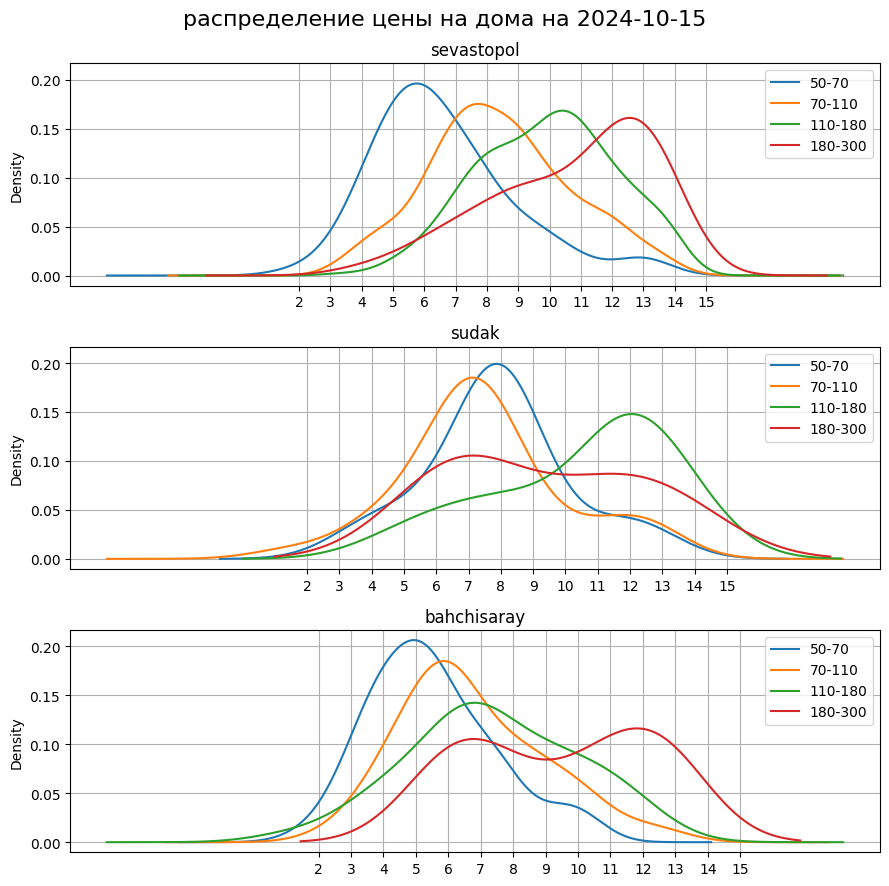

In [44]:
q_95 = gdf_last.groupby(['place'])['priceM'].quantile(.95)

places = ['sevastopol','sudak','bahchisaray']

fig, ax = plt.subplots(len(places),1,figsize=(9,9), sharey=True )
for i,p in enumerate(places): 
    (
        gdf_last
        .query(f' (place=="{p}") & (priceM<{q_95[p]}) & (house_size_category in {sizes})')
        .groupby(['house_size_category'],observed=True)
        ['priceM']
        .plot.kde(legend=True,ax=ax[i],title=f'{p}', grid=True)   
    )
    ax[i].set_xticks( np.arange(2, 16, step=1) )

fig.suptitle(f'распределение цены на дома на '+ str( dt_now ), fontsize=16)
fig.tight_layout()

In [45]:
# (
# gdf_last
# .query(f' (place=="{p}") & (priceM<{q_95[p]}) & (house_size_category in {sizes})')
# .groupby(['house_size_category'],observed=True)
# ['priceM'].plot.kde()
# )

# цены на карте

In [46]:
import h3
from shapely.geometry import Polygon
from shapely.geometry import MultiPoint

In [47]:
def cover_grid_hexagonal(gmtr,cell_size=6,crs='EPSG:4326'):
    polygonise = lambda hex_id: Polygon( h3.h3_to_geo_boundary( hex_id, geo_json=True)  )
    hexs = list(h3.polyfill( gmtr.__geo_interface__, cell_size, geo_json_conformant = True ))
    return gpd.GeoDataFrame({ 'hex_id': hexs,  'geometry': list(map(polygonise, hexs)), },crs=crs,)

In [48]:
# cols = ['title','address','latitude','longitude','priceM','dt','url']
# gdf_last.query('place=="sevastopol"')[cols]

In [49]:
# gdf_last[gdf_last['place']=='sevastopol'][cols]

## Севастополь

In [50]:
frame_sevastopol = gpd.GeoDataFrame([{ # все предложения
            'place':'sevastopol', 
            'geometry':MultiPoint( gdf_last.query('place=="sevastopol"')['geometry'].tolist() ).convex_hull, 
        }],crs='EPSG:4326')

frame_sevastopol.explore()

In [51]:
grid = cover_grid_hexagonal( frame_sevastopol.geometry.values[0],cell_size=7 )
grid_values = ( 
    grid
    .sjoin( gdf_last.query('place=="sevastopol"'), how='inner',)
    .groupby(['hex_id'])
    ['priceM']
    .median()
    .reset_index()
)
grid.merge(grid_values,on='hex_id').explore('priceM',cmap='rainbow') #'area_name', legend=True)

## Судак

In [52]:
frame_sudak = gpd.GeoDataFrame([{ # все предложения
            'place':'sudak', 
            'geometry':MultiPoint( gdf_last.query('place=="sudak"')['geometry'].tolist() ).convex_hull, 
        }],crs='EPSG:4326')

# frame_sudak.explore()

In [53]:
grid = cover_grid_hexagonal( frame_sudak.geometry.values[0],cell_size=8 )
grid_values = ( 
    grid
    .sjoin( gdf_last.query('place=="sudak"'), how='inner',)
    .groupby(['hex_id'])
    ['priceM']
    .median()
    .reset_index()
)
grid.merge(grid_values,on='hex_id').explore('priceM',cmap='rainbow') #'area_name', legend=True)

# районы Севастополя

In [54]:
# загружаем области поиска
frames_path = 'data/frames/'
frames_index = pd.read_csv(f'{frames_path}/_index.tsv',sep='\t')

swap_coo = lambda coo : [ (c[1],c[0]) for c in coo ]
df2poly = lambda df : Polygon(swap_coo(df.values))

frames = gpd.GeoDataFrame([ 
        { 'area_name':nm, 'geometry': df2poly( pd.read_csv(f'{frames_path}/{f}',header=None) ) } 
        for nm,f in frames_index.values
    ],crs='epsg:4326',)

In [55]:
display(frames)

area_name  \
0     Севастополь, район Острякова   
1  Севастополь, парк 60-летия СССР   
2  Севастополь, Хрусталёва/Хрюкина   
3  Севастополь, Геловани/Коломийца   
4     Севастополь, Музыки/Бирюзова   
5   Севастополь, кр.горка (старый)   
6    Севастополь, кр.горка (новый)   
7      Севастополь, Малахов курган   
8       Севастополь, Благополучный   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        geometry  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                          POLYGON ((33.51618 44.58832, 33.52597 44.58817, 33.53399 44.57315, 33.54248 44.55177, 33.52583 44.55023, 33.51174 44.57861, 33.51253 44.58565, 33.51253 44.58565, 33.51618 44.58832))  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   POLYGON ((33.51805 44.58404, 33.51458 44.58408, 33.51263 44.58031, 33.51435 44.57460, 33.52004 44.57520, 33.51805 44.58404))  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             POLYGON ((33.52003 44.57511, 33.52527 44.56364, 33.52116 44.56136, 33.51942 44.56406, 33.51951 44.56384, 33.51874 44.56882, 33.51426 44.57444, 33.52003 44.57511))  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             POLYGON ((33.52139 44.57296, 33.53034 44.57518, 33.53318 44.57413, 33.53369 44.57139, 33.53244 44.56878, 33.53123 44.56774, 33.52440 44.56640, 33.52139 44.57296))  
4                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [56]:
frames.explore('area_name', legend=True)

In [57]:
area_name=[
#'Севастополь, парк 60-летия СССР',
#'Севастополь, Хрусталёва/Хрюкина',
#'Севастополь, район Острякова',
#'Севастополь, Малахов курган',
'Севастополь, кр.горка (старый)',
'Севастополь, кр.горка (новый)',
'Севастополь, Благополучный',
]

In [58]:
# выбираем область
frame_ = frames[frames['area_name'].isin(area_name)]

# фильтруем данные по области
gdf_last_local = gdf_last.sjoin( frame_, how='inner', predicate='within') 
gdf_last_local[['title','priceM','address','geometry']].explore( legend=False)

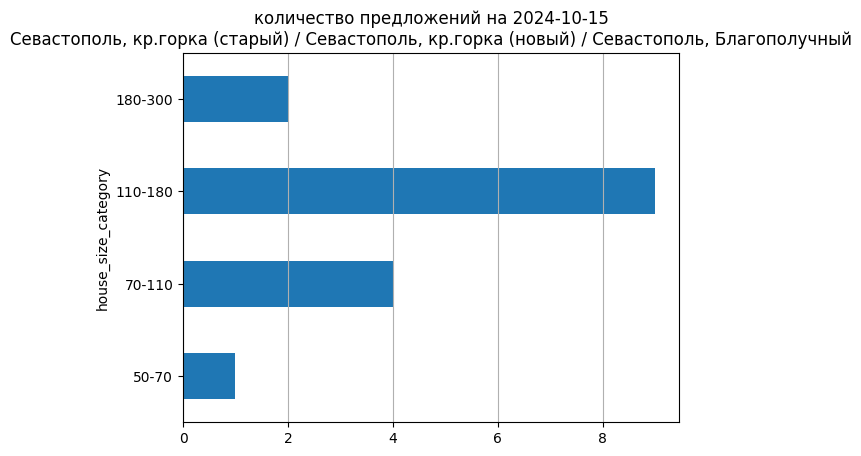

In [59]:
(
    gdf_last_local
    .drop_duplicates('url')
    .query('house_size_category in @sizes')
    .groupby(['house_size_category'], observed=True)['url'].count()
    .plot.barh(title='количество предложений на '+ str(dt_now) + '\n' + ' / '.join(area_name) )
    .grid(axis='x')    
)

In [60]:
sizes_ = ['70-110','110-180',] # '180-300' ]
# gdf_last_local.query('house_size_category in @sizes_')

In [61]:
# q_95 = gdf_last_local['priceM'].quantile(.95)

# # fig, ax = plt.subplots() #figsize=(7,3) )
# (
#     gdf_last_local
#     .query(f'(priceM<{q_95})')
#     .query('house_size_category in @sizes_')
#     #.groupby(['house_size_category'],observed=True)
#     .pivot(columns='house_size_category',values='priceM')
#     #['priceM']
#     #.count()
#     .plot.kde(
#         legend=True,
#         #ax=ax,
#         # title='/'.join(area_name), 
#         title=f'распределение цены на дома на '+ str( dt_now )+ '\n'+'/'.join(area_name), 
#         grid=True,
#         subplots=True,
#         layout=(2,2),
#         figsize=(11,6),
#         sharex=False
#     )   
# )
# #fig.suptitle(f'распределение цены на дома на '+ str( dt_now ), fontsize=16)
# #fig.tight_layout()

----

In [62]:
# изменение цены по району
gdf_local = gdf.sjoin( frame_, how='inner', predicate='within') 

In [63]:
stat = (
        gdf_local
        # .groupby(['house_size_category','month'],observed=True)
        .groupby(['house_size_category','week'],observed=True)
        ['priceM'].describe(percentiles=percentiles)
        .dropna()
    )
display( stat )

count  mean  std   min    1%    5%  \
house_size_category week                                                        
50-70               2024-06-03/2024-06-09   2.00  7.04 0.97  6.35  6.36  6.42   
                    2024-06-10/2024-06-16   2.00  8.68 3.29  6.35  6.40  6.58   
                    2024-06-17/2024-06-23   2.00  7.04 0.97  6.35  6.36  6.42   
                    2024-07-29/2024-08-04   2.00  6.55 1.48  5.50  5.52  5.61   
70-110              2024-06-03/2024-06-09   8.00  7.96 2.95  5.40  5.41  5.44   
                    2024-06-10/2024-06-16   8.00  7.96 2.95  5.40  5.41  5.44   
                    2024-06-17/2024-06-23   9.00  7.80 2.80  5.40  5.41  5.44   
                    2024-06-24/2024-06-30   9.00  7.84 2.83  5.40  5.41  5.44   
                    2024-07-08/2024-07-14   6.00  7.77 2.84  5.22  5.23  5.27   
                    2024-07-15/2024-07-21   8.00  7.00 1.95  5.22  5.24  5.29   
                    2024-07-22/2024-07-28   9.00  7.54 1.87  5.40  5.42  5.48   
                    2024-07-29/2024-08-04  10.00  7.74 1.88  5.40  5.42  5.49   
                    2024-08-05/2024-08-11   7.00  6.85 1.83  5.20  5.21  5.26   
                    2024-08-12/2024-08-18  10.00  8.38 3.14  5.20  5.22  5.29   
                    2024-08-19/2024-08-25  13.00  8.88 2.87  5.40  5.40  5.40   
                    2024-08-26/2024-09-01   7.00  8.05 1.83  5.40  5.42  5.52   
                    2024-09-02/2024-09-08   9.00  7.53 1.97  5.40  5.40  5.40   
                    2024-09-09/2024-09-15   4.00  6.95 1.97  5.40  5.40  5.40   
                    2024-09-16/2024-09-22   5.00  7.56 2.06  5.40  5.40  5.40   
                    2024-09-30/2024-10-06   9.00  7.44 2.14  5.40  5.41  5.44   
                    2024-10-07/2024-10-13   9.00  7.97 2.26  5.40  5.41  5.44   
                    2024-10-14/2024-10-20   4.00  8.15 2.71  5.75  5.75  5.76   
110-180             2024-06-03/2024-06-09   5.00 11.10 2.28  9.60  9.60  9.60   
                    2024-06-10/2024-06-16   8.00 10.30 2.08  8.30  8.34  8.51   
                    2024-06-17/2024-06-23   9.00  9.66 2.80  4.25  4.57  5.87   
                    2024-06-24/2024-06-30   4.00  7.89 2.52  4.25  4.37  4.86   
                    2024-07-08/2024-07-14   9.00  9.75 2.93  3.80  4.21  5.84   
                    2024-07-15/2024-07-21   6.00  9.50 3.62  3.75  4.01  5.04   
                    2024-07-22/2024-07-28   6.00  8.56 2.52  3.75  3.98  4.89   
                    2024-07-29/2024-08-04   8.00 10.42 1.94  8.30  8.34  8.51   
                    2024-08-05/2024-08-11   8.00 10.49 3.48  3.75  4.11  5.55   
                    2024-08-12/2024-08-18   7.00 10.56 3.75  3.75  4.06  5.29   
                    2024-08-19/2024-08-25   5.00  8.09 2.59  3.75  3.91  4.56   
                    2024-08-26/2024-09-01   5.00 10.21 2.55  7.80  7.84  8.02   
                    2024-09-02/2024-09-08   6.00  9.46 3.70  3.75  3.95  4.76   
                    2024-09-09/2024-09-15   5.00  9.54 4.13  3.75  3.91  4.56   
                    2024-09-16/2024-09-22   3.00  9.93 1.00  8.90  8.92  9.01   
                    2024-09-30/2024-10-06   9.00 10.27 3.03  3.75  4.16  5.81   
                    2024-10-07/2024-10-13  10.00 10.26 2.74  3.75  4.21  6.07   
                    2024-10-14/2024-10-20   9.00 10.01 1.05  7.80  7.89  8.24   
180-300             2024-06-10/2024-06-16   2.00 11.38 1.94 10.00 10.03 10.14   
                    2024-06-17/2024-06-23   2.00 11.38 1.94 10.00 10.03 10.14   
                    2024-07-08/2024-07-14   2.00 11.38 1.94 10.00 10.03 10.14   
                    2024-07-15/2024-07-21   2.00 11.38 1.94 10.00 10.03 10.14   
                    2024-07-22/2024-07-28   2.00 11.38 1.94 10.00 10.03 10.14   
                    2024-08-12/2024-08-18   2.00 11.38 1.94 10.00 10.03 10.14   
                    2024-08-19/2024-08-25   2.00 11.38 1.94 10.00 10.03 10.14   
                    2024-08-26/2024-09-01   2.00 11.38 1.94 10.00 10.03 10

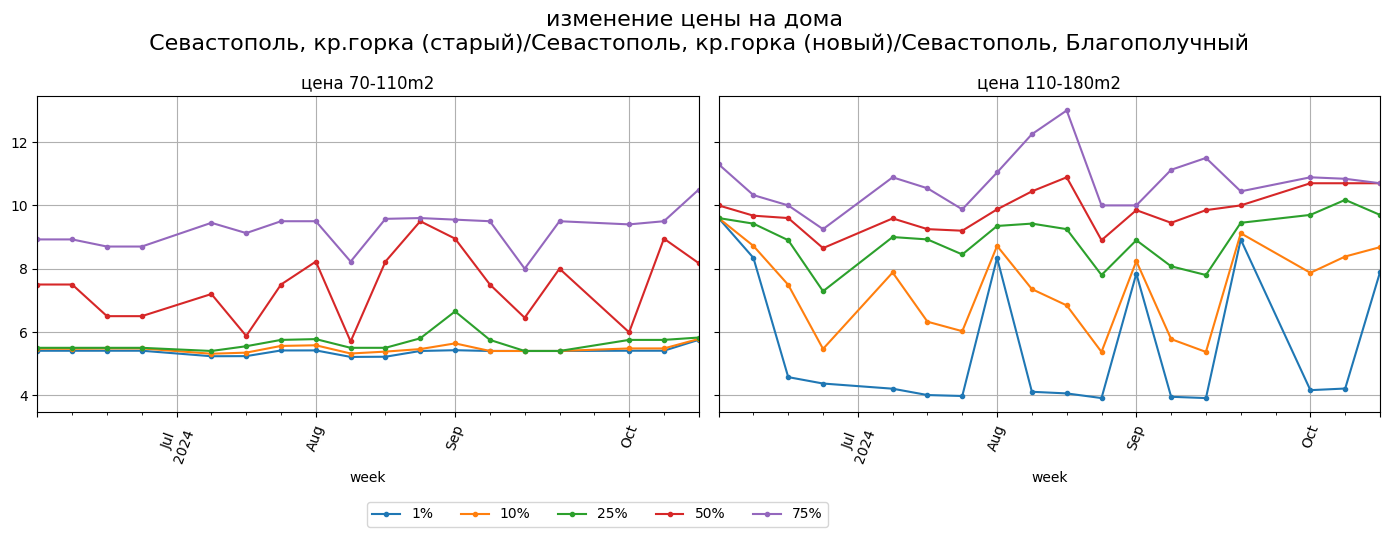

In [64]:
fig, ax = plt.subplots(1,len(sizes_),figsize=(14,5), sharey=True )

for i,s in enumerate(sizes_): 
    stat.loc[(s),cols].plot(title=f'цена {s}m2', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'изменение цены на дома\n {'/'.join(area_name)}', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

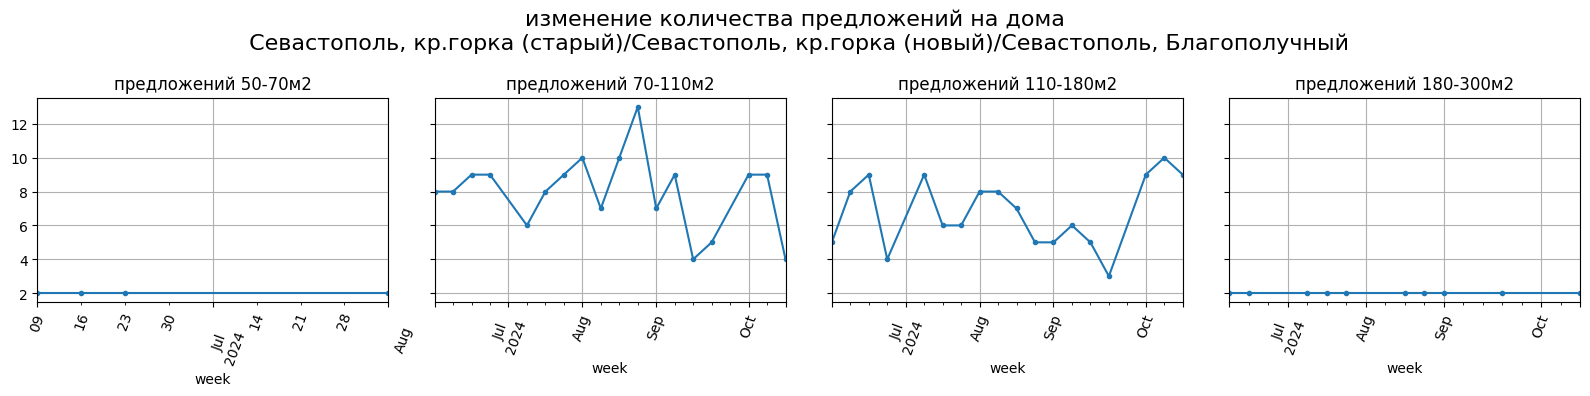

In [65]:
fig, ax = plt.subplots(1,len(sizes),figsize=(16,4), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(s),'count'].plot(title=f'предложений {s}м2', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'изменение количества предложений на дома\n {'/'.join(area_name)}', fontsize=16)

#fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()